In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  
import seaborn as sns

%matplotlib inline 

# Вспоминаем numpy

В большинстве приложений для анализа данных основной интерес представляет следующая функциональность:
+ быстрые векторные операции для переформатирования и очистки данных, выборки подмножеств и фильтрации, преобразований и других видов вычислений;
+ стандартные алгоритмы работы с  массивами, например фильтрация, удаление дубликатов и теоретико-множественные операции;
+ эффективная описательная статистика, агрегирование и  обобщение данных;
+ выравнивание данных и реляционные операции объединения и соединения разнородных наборов данных;
+ описание условной логики в виде выражений-массивов вместо циклов с ветвлением if-elif-else;
+ групповые операции с данными (агрегирование, преобразование, применение функции).

## Чем отличается массив от списка?

Главное различие между ними заключается в том, что списки могут хранить разнородные данные, а массивы — только данные одного типа. Например, только строки или только числа, причем отдельно целые и отдельно с плавающей запятой. Поэтому вот такой список в Python:

list = ['element1', 'element2', 'element3']

одновременно выполняет и функции массива. Как видим, элементы списка располагаются внутри квадратных скобок и перечисляются через запятую.

+ в списке переход пошаговый от 1-го элемента к 5-му, а массив позволяет обратиться к 5-му элементу сразу, без пошаговости.

**Сравнение быстродействия**

In [3]:
array_ = np.arange(1000000)
list_ = list(array_)

In [4]:
array_

array([     0,      1,      2, ..., 999997, 999998, 999999])

In [5]:
%%time 
array_2 = array_ * 2

CPU times: total: 0 ns
Wall time: 4.29 ms


In [6]:
%%time 
list_2 = []
for i in list_:
    list_2.append(i * 2)

CPU times: total: 500 ms
Wall time: 509 ms


In [7]:
%%time 
list_2 = [i * 2 for i in list_]

CPU times: total: 375 ms
Wall time: 366 ms


**Многомерные массивы**

In [164]:
data = np.array([[1.5, -0.1, 3], [0, -3, 6.5]])

In [165]:
data

array([[ 1.5, -0.1,  3. ],
       [ 0. , -3. ,  6.5]])

In [166]:
type(data)

numpy.ndarray

In [167]:
data * 2

array([[ 3. , -0.2,  6. ],
       [ 0. , -6. , 13. ]])

In [168]:
data + data

array([[ 3. , -0.2,  6. ],
       [ 0. , -6. , 13. ]])

ndarray – это обобщенный многомерный контейнер для однородных данных, т. е. в нем могут храниться только элементы одного типа. У любого массива есть атрибут shape – кортеж, описывающий размер по каждому измерению,
и атрибут dtype – объект, описывающий тип данных в массиве:

In [169]:
data.shape

(2, 3)

In [170]:
data.dtype

dtype('float64')

In [171]:
np.array(["str", 1])

array(['str', '1'], dtype='<U11')

In [173]:
np.array(["str", 1]) * 2

TypeError: ufunc 'square' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

**Создание массивов**

In [17]:
np.ones(10)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [18]:
np.zeros(10)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [19]:
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

**Задани 1**
+ Создать единичную матрицу 4x4;
+ Создать матрицу 4x4, заполненную 5.

In [20]:
np.eye(4)

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

In [21]:
df = np.ones((4,4))
df + 4

array([[5., 5., 5., 5.],
       [5., 5., 5., 5.],
       [5., 5., 5., 5.],
       [5., 5., 5., 5.]])

In [22]:
np.full((4,4),5)

array([[5, 5, 5, 5],
       [5, 5, 5, 5],
       [5, 5, 5, 5],
       [5, 5, 5, 5]])

**Возведение элементов матрицы в квадрат и возведение матрицы в квадрат**

In [23]:
m = np.array([[1, 2, 3], [4, 5, 6], [1, 2, 3]])

In [24]:
m ** 2

array([[ 1,  4,  9],
       [16, 25, 36],
       [ 1,  4,  9]], dtype=int32)

In [25]:
np.dot(m, m)

array([[12, 18, 24],
       [30, 45, 60],
       [12, 18, 24]])

In [26]:
m @ m

array([[12, 18, 24],
       [30, 45, 60],
       [12, 18, 24]])

## Индексирование

In [27]:
m[0]

array([1, 2, 3])

In [28]:
m[0, 0]

1

In [29]:
m[0][1:]

array([2, 3])

**Булево индексирование**

In [30]:
m%2 == 1

array([[ True, False,  True],
       [False,  True, False],
       [ True, False,  True]])

In [31]:
m[m%2 == 1]

array([1, 3, 5, 1, 3])

In [32]:
m[~m%2 == 1]

array([2, 4, 6, 2])

In [33]:
m[~m%2 == 1] = 100
m

array([[  1, 100,   3],
       [100,   5, 100],
       [  1, 100,   3]])

In [34]:
m.T #транспонирование

array([[  1, 100,   1],
       [100,   5, 100],
       [  3, 100,   3]])

In [35]:
np.arange(15)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In [36]:
arr = np.arange(15).reshape((3, 5))
arr

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [37]:
arr.swapaxes(0, 1) # тоже самое транспонирование

array([[ 0,  5, 10],
       [ 1,  6, 11],
       [ 2,  7, 12],
       [ 3,  8, 13],
       [ 4,  9, 14]])

In [38]:
arr.T

array([[ 0,  5, 10],
       [ 1,  6, 11],
       [ 2,  7, 12],
       [ 3,  8, 13],
       [ 4,  9, 14]])

**Задание 2**\
Отобрать те строки data, где на соответствующих позициях в names имя Леша или Петя.

In [39]:
names = np.array(["Настя", "Петя", "Вася", "Юра", "Паша", "Леша", "Леша"])
data = np.array([[4, 8], [1, 5], [-3, 9], [99, 0], [13, 22], [12, 49], [31, 4]])

In [40]:
# ваш ответ здесь
names == 'Леша'


array([False, False, False, False, False,  True,  True])

In [41]:
names == 'Петя'

array([False,  True, False, False, False, False, False])

In [42]:
data[(names == 'Леша') | (names == 'Петя')]

array([[ 1,  5],
       [12, 49],
       [31,  4]])

## Быстрые поэлементные операции над массивами

In [43]:
arr = np.arange(10)

In [44]:
np.sqrt(arr)

array([0.        , 1.        , 1.41421356, 1.73205081, 2.        ,
       2.23606798, 2.44948974, 2.64575131, 2.82842712, 3.        ])

In [45]:
np.exp(arr)

array([1.00000000e+00, 2.71828183e+00, 7.38905610e+00, 2.00855369e+01,
       5.45981500e+01, 1.48413159e+02, 4.03428793e+02, 1.09663316e+03,
       2.98095799e+03, 8.10308393e+03])

In [46]:
np.maximum(np.sqrt(arr), np.exp(arr)/3)

array([3.33333333e-01, 1.00000000e+00, 2.46301870e+00, 6.69517897e+00,
       1.81993833e+01, 4.94710530e+01, 1.34476264e+02, 3.65544386e+02,
       9.93652662e+02, 2.70102798e+03])

In [47]:
np.floor(np.sqrt(arr))

array([0., 1., 1., 1., 2., 2., 2., 2., 2., 3.])

In [48]:
np.ceil(np.sqrt(arr))

array([0., 1., 2., 2., 2., 3., 3., 3., 3., 3.])

In [49]:
np.round(np.sqrt(arr))

array([0., 1., 1., 2., 2., 2., 2., 3., 3., 3.])

## Программирование на основе массивов

In [50]:
points = np.arange(-5, 5, 0.01) # 100 равноотстоящих точек
xs, ys = np.meshgrid(points, points)
ys

array([[-5.  , -5.  , -5.  , ..., -5.  , -5.  , -5.  ],
       [-4.99, -4.99, -4.99, ..., -4.99, -4.99, -4.99],
       [-4.98, -4.98, -4.98, ..., -4.98, -4.98, -4.98],
       ...,
       [ 4.97,  4.97,  4.97, ...,  4.97,  4.97,  4.97],
       [ 4.98,  4.98,  4.98, ...,  4.98,  4.98,  4.98],
       [ 4.99,  4.99,  4.99, ...,  4.99,  4.99,  4.99]])

In [51]:
xs

array([[-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       ...,
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99]])

In [52]:
z = np.sqrt(xs ** 2 + ys ** 2)

In [53]:
xarr = np.array([1.1, 1.2, 1.3, 1.4, 1.5])
yarr = np.array([2.1, 2.2, 2.3, 2.4, 2.5])
cond = np.array([True, False, True, True, False])

In [54]:
result = [(x if c else y) for x, y, c in zip(xarr, yarr, cond)]
result

[1.1, 2.2, 1.3, 1.4, 2.5]

In [55]:
result = np.where(cond, xarr, yarr)

In [56]:
np.where(xarr > 1.3, 2, xarr)

array([1.1, 1.2, 1.3, 2. , 2. ])

**Задача 3**\
Сгенерировать массив из случайных положительных чисел произвольной длины. Вывести элементы, которые больше среднего арифметического.

In [57]:
#np.arange(10)

In [58]:
np.random.randint(1, high=100, size=10)

array([67, 27, 92,  1, 66, 39, 98, 65, 24, 33])

In [59]:
arr = np.random.randint(1, high=100, size=np.random.randint(1,100))
arr

array([23, 95, 30,  7, 55, 46, 19, 85, 98, 78, 28, 36, 24, 77,  6, 50, 89,
       39, 26,  7, 65, 56, 89, 95, 57, 46, 67, 32, 44, 83, 92, 52, 42, 72,
       36, 45, 17, 48, 60])

In [60]:
arr.mean()

51.69230769230769

In [61]:
arr[arr>arr.mean()]

array([95, 55, 85, 98, 78, 77, 89, 65, 56, 89, 95, 57, 67, 83, 92, 52, 72,
       60])

**Задача 4**\
Сгенерировать массив из 20 случайных элементов, элементы которого лежат в интервале [0, 10].
+ Определить количество элементов, отличающихся от минимального на 5.
+ Найти среднее арифметическое всех четных элементов массива, стоящих на нечетных местах.

In [62]:
arr = np.random.randint(0, high=11, size=20)
arr

array([ 9, 10,  8,  4,  6,  5,  6,  9,  0,  2,  4,  9,  7, 10,  4,  3,  4,
        4,  3,  8])

In [63]:
arr.min()

0

In [64]:
arr[arr != arr.min()]

array([ 9, 10,  8,  4,  6,  5,  6,  9,  2,  4,  9,  7, 10,  4,  3,  4,  4,
        3,  8])

**Задача 5**\
Сгенерировать матрицу A размером 5 на 5, элементы которой лежат в интервале [1, 10].
+ Возвести в квадрат максимальный элемент матрицы.
+ Все четные числа заменить на 0.

In [80]:
arr = np.random.randint(1, 11, size=(5, 5))
arr

array([[ 2,  7, 10,  1,  5],
       [ 9,  3,  7,  7,  6],
       [ 6,  8,  9,  2,  6],
       [10,  8,  9,  3,  8],
       [ 8,  1,  3,  8,  8]])

In [81]:
maх_1 = arr.max()
maх_1**2

100

In [82]:
arr[arr%2 == 0] = 0
arr

array([[0, 7, 0, 1, 5],
       [9, 3, 7, 7, 0],
       [0, 0, 9, 0, 0],
       [0, 0, 9, 3, 0],
       [0, 1, 3, 0, 0]])

**Задача 6**\
Сгенерировать матрицу B размером 5 на 5, элементы которой лежат в интервале [-5, 5]. Отрицательные элементы матрицы заменить на число отрицательных элементов в строке, в которой они находятся.

In [84]:
arr = np.random.randint(-5, 6, size=(5, 5))
arr

array([[ 0,  4,  1,  2, -2],
       [ 4,  3,  3, -5,  0],
       [-2,  5, -3,  4,  5],
       [ 0,  0,  4,  4,  0],
       [-3,  5, -4,  0,  2]])

In [86]:
for i in range(5):
    count = np.sum(arr[i] < 0)
    arr[i, arr[i] < 0] = count
arr

array([[0, 4, 1, 2, 1],
       [4, 3, 3, 1, 0],
       [2, 5, 2, 4, 5],
       [0, 0, 4, 4, 0],
       [2, 5, 2, 0, 2]])

# Вспоминаем pandas несильно

Какие отличия между исследовательскими университетами и школами искусств?
Используя данные из файла colleges, выдвините предположения о возможных различиях между двумя типами институтов.
Для это проведите описательный анализ исходных данных.  Выдвините несколько гипотез.
Например, "В университеты поступить сложнее (процент принятых меньше)"

Формат файла
+ School -  название школы
+ School_Type - тип школы (школа искусств  'LibArts', исследовательский университет 'Univ')
+ SAT - медиана объединенных значений Math и Verbal SAT  студентов
+ Acceptance: - % принятых абитуриентов
+ $/Student  -  Деньги, расходуемые на одного студента в среднем
+ Top 10% -  % студентов в топ 10% выпускных классов
+ %PhD -  %  факультетов, имеющих PhD
+ Grad%: % студентов, которые успешно завершили обучение

In [160]:
df = pd.read_csv('colleges.txt', delimiter='\t')

In [161]:
df.head()

,School,School_Type,SAT,Acceptance,$/Student,Top 10%,%PhD,Grad%
0,Amherst,Lib Arts,1315,22,26636,85,81,93
1,Swarthmore,Lib Arts,1310,24,27487,78,93,88
2,Williams,Lib Arts,1336,28,23772,86,90,93
3,Bowdoin,Lib Arts,1300,24,25703,78,95,90
4,Wellesley,Lib Arts,1250,49,27879,76,91,86


В сведения о датафрейме входит общая информация о нём вроде заголовка, количества значений, типов данных столбцов.

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   School       50 non-null     object
 1   School_Type  50 non-null     object
 2   SAT          50 non-null     int64 
 3   Acceptance   50 non-null     int64 
 4   $/Student    50 non-null     int64 
 5   Top 10%      50 non-null     int64 
 6   %PhD         50 non-null     int64 
 7   Grad%        50 non-null     int64 
dtypes: int64(6), object(2)
memory usage: 3.2+ KB


Вывод статистических сведений о датафрейме:

In [90]:
df.describe()

,SAT,Acceptance,$/Student,Top 10%,%PhD,Grad%
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,1263.960000,37.840000,30247.200000,74.440000,90.560000,83.480000
std,62.329591,13.363612,15266.172682,13.515162,8.258972,7.557237
min,1109.000000,17.000000,17520.000000,47.000000,58.000000,61.000000
25%,1225.000000,25.750000,20182.250000,65.000000,86.250000,77.250000
50%,1264.000000,36.000000,24994.500000,76.500000,93.000000,85.500000
75%,1304.500000,47.750000,36803.750000,85.000000,97.750000,89.000000
max,1400.000000,67.000000,102262.000000,98.000000,100.000000,95.000000


**Задание 1**\
Проверить являются ли выборки связными.

In [97]:
from scipy.stats import ttest_ind

In [118]:
# Разделение данных на две выборки: университеты и школы искусств
univ = df[df['School_Type'] == 'Univ']
libarts = df[df['School_Type'] == 'Lib Arts']
univ

,School,School_Type,SAT,Acceptance,$/Student,Top 10%,%PhD,Grad%
25,Harvard,Univ,1370,18,46918,90,99,90
26,Stanford,Univ,1370,18,61921,92,96,88
27,Yale,Univ,1350,19,52468,90,97,93
28,Princeton,Univ,1340,17,48123,89,99,93
29,Cal Tech,Univ,1400,31,102262,98,98,75
30,MIT,Univ,1357,30,56766,95,98,86
31,Duke,Univ,1310,25,39504,91,95,91
32,Dartmouth,Univ,1306,25,35804,86,100,95
33,Cornell,Univ,1280,30,37137,85,90,83
34,Columbia,Univ,1268,29,45879,78,93,90


In [119]:
libarts

,School,School_Type,SAT,Acceptance,$/Student,Top 10%,%PhD,Grad%
0,Amherst,Lib Arts,1315,22,26636,85,81,93
1,Swarthmore,Lib Arts,1310,24,27487,78,93,88
2,Williams,Lib Arts,1336,28,23772,86,90,93
3,Bowdoin,Lib Arts,1300,24,25703,78,95,90
4,Wellesley,Lib Arts,1250,49,27879,76,91,86
5,Pomona,Lib Arts,1320,33,26668,79,98,80
6,Wesleyan (CT),Lib Arts,1290,35,19948,73,87,91
7,Middlebury,Lib Arts,1255,25,24718,65,89,92
8,Smith,Lib Arts,1195,57,25271,65,90,87
9,Davidson,Lib Arts,1230,36,17721,77,94,89


In [120]:
# Преобразование значений SAT в числовой формат
univ['SAT'] = pd.to_numeric(univ['SAT'], errors='coerce')
libarts['SAT'] = pd.to_numeric(libarts['SAT'], errors='coerce')

C:\Users\София\AppData\Local\Temp\ipykernel_3992\164401426.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  univ['SAT'] = pd.to_numeric(univ['SAT'], errors='coerce')
C:\Users\София\AppData\Local\Temp\ipykernel_3992\164401426.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  libarts['SAT'] = pd.to_numeric(libarts['SAT'], errors='coerce')


In [121]:
# Удаление пропущенных значений, чтобы избежать ошибки
univ = univ.dropna(subset=['SAT'])
libarts = libarts.dropna(subset=['SAT'])

In [122]:
t_statistic, p_value = ttest_ind(univ['SAT'], libarts['SAT'])
# Проверка значимости
alpha = 0.05
if p_value < alpha:
    print("Отвергаем нулевую гипотезу. Существуют статистически значимые различия.")
else:
    print("Не отвергаем нулевую гипотезу. Нет статистически значимых различий.")

Не отвергаем нулевую гипотезу. Нет статистически значимых различий.


In [123]:
# Вывод результатов теста
print(f"t-статистика: {t_statistic}")
print(f"p-значение: {p_value}")

t-статистика: 0.827755644605505
p-значение: 0.4119055324956731


Ответ: они не связаны, школы не пересекаются

**Задание 2**\
Постройте ящики с усами по каждой из характеристик (SAT ... Grad%) для каждого типа институтов. Какие из следующих утверждений верны (речь идет о наблюдаемых данных)?

In [126]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

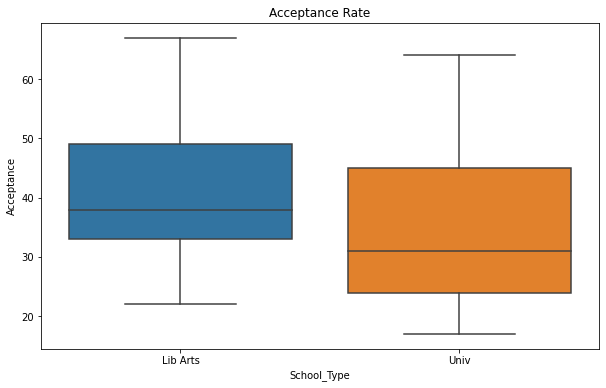

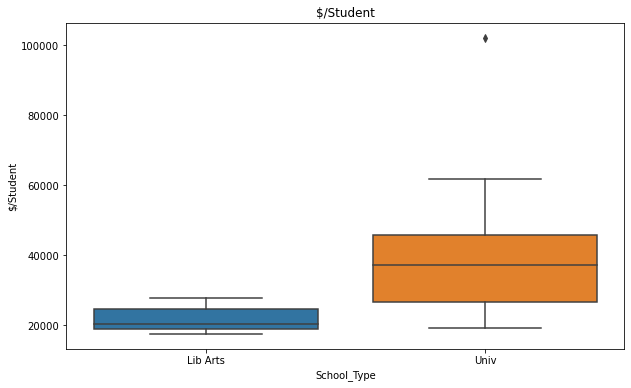

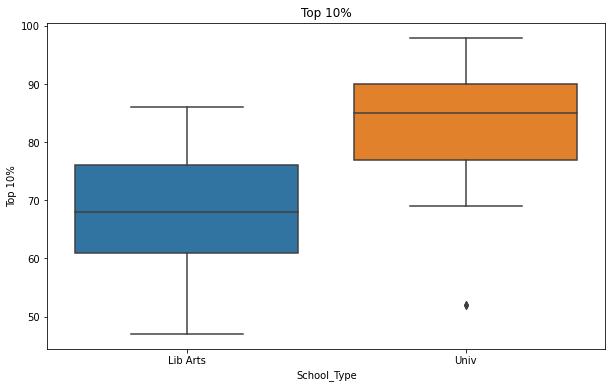

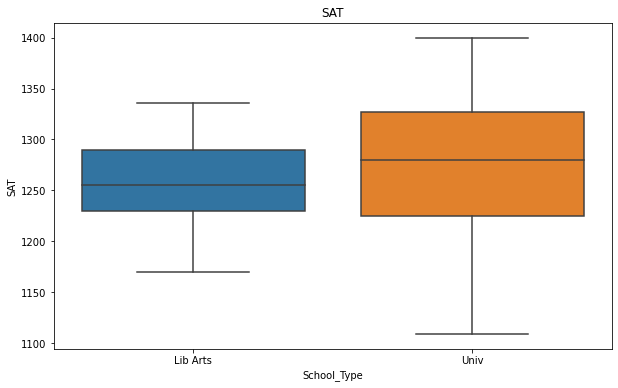

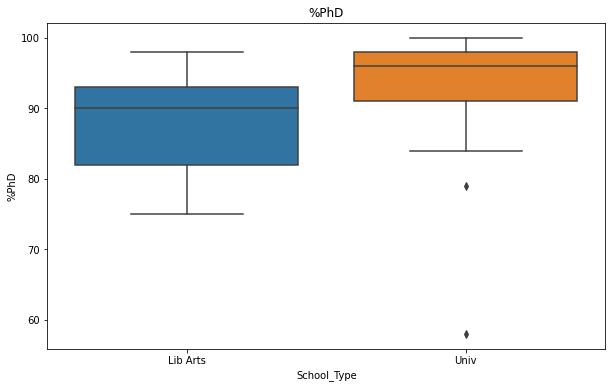

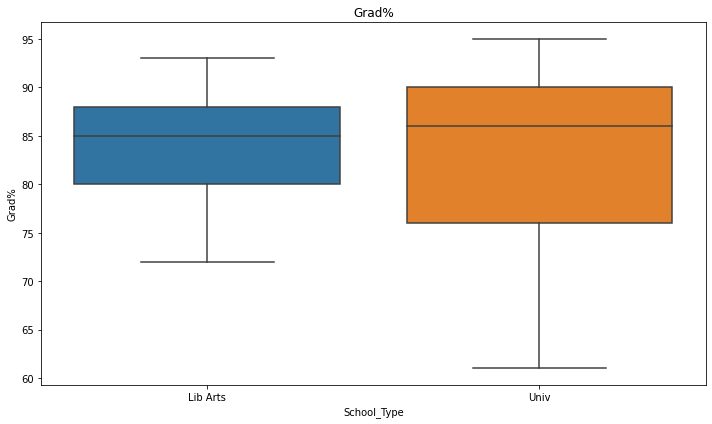

In [134]:
# Boxplot для Acceptance
plt.figure(figsize=(10, 6))
sns.boxplot(x='School_Type', y='Acceptance', data=df)
plt.title('Acceptance Rate')

# Boxplot для $/Student
plt.figure(figsize=(10, 6))
sns.boxplot(x='School_Type', y='$/Student', data=df)
plt.title('$/Student')

# Boxplot для Top 10%
plt.figure(figsize=(10, 6))
sns.boxplot(x='School_Type', y='Top 10%', data=df)
plt.title('Top 10%')

# Boxplot для SAT
plt.figure(figsize=(10, 6))
sns.boxplot(x='School_Type', y='SAT', data=df)
plt.title('SAT')

# Boxplot для %PhD
plt.figure(figsize=(10, 6))
sns.boxplot(x='School_Type', y='%PhD', data=df)
plt.title('%PhD')

# Boxplot для Grad%
plt.figure(figsize=(10, 6))
sns.boxplot(x='School_Type', y='Grad%', data=df)
plt.title('Grad%')

plt.tight_layout()
plt.show()

In [132]:
%%HTML
<input type="checkbox" id="0">
<label for="0">% процент принятых студентов в школах искусств заметно ниже, чем в университетах</label><br>

<input type="checkbox" id="1">
<label for="1">Разброс средств, расходуемых в среднем на одного студента, в школах искусств больше, чем в университетах</label><br>

<input type="checkbox" id="2">
<label for="2">% процент принятых студентов в школах искусств и в университетах примерно равны</label><br>

<input type="checkbox" id="3">
<label for="3">Разброс баллов SAT в университетах ниже, чем в школах искусств</label><br>

<input type="checkbox" id="0">
<label for="0">Разброс баллов SAT в университетах выше, чем в школах искусств</label><br>

<input type="checkbox" id="0">
<label for="0">Разброс средств, расходуемых в среднем на одного студента, в школах искусств меньше, чем в университетах</label><br>

<input type="checkbox" id="0">
<label for="0">В одном из университетов тратят сильно больше денег в среднем на одного студента, чем в других университетах</label><br>

<input type="checkbox" id="0">
<label for="0">Разброс баллов SAT в университетах и школах искусств практически не различается</label><br>

<input type="checkbox" id="0">
<label for="0">% процент принятых студентов в школах искусств заметно выше, чем в университетах</label><br>

**Задание 3**\
Постройте гистограммы по каждой из характеристик (SAT ... Grad%) для каждого типа институтов. Какие из следующих утверждений верны (речь идет о наблюдаемых данных)?

Hint: для каждой пары связанных утверждений, надо выбрать одно из них.

Text(0.5, 1.0, 'Grad%')

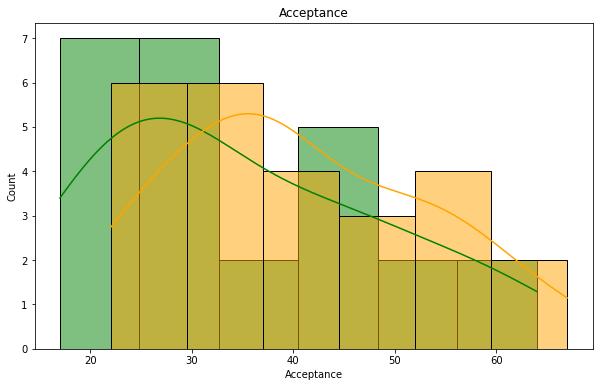

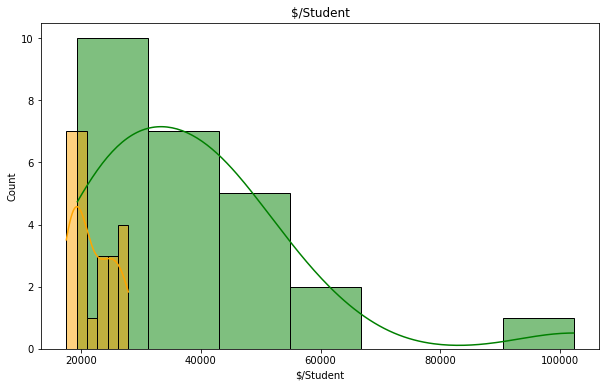

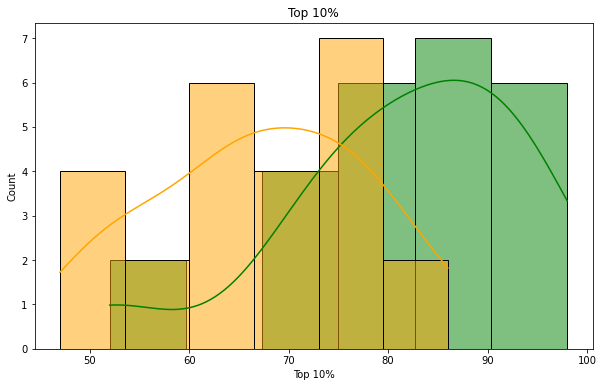

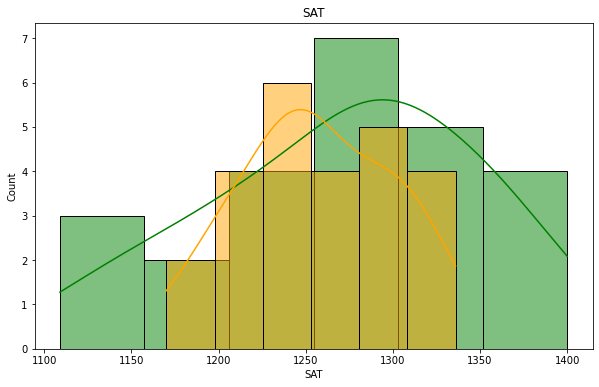

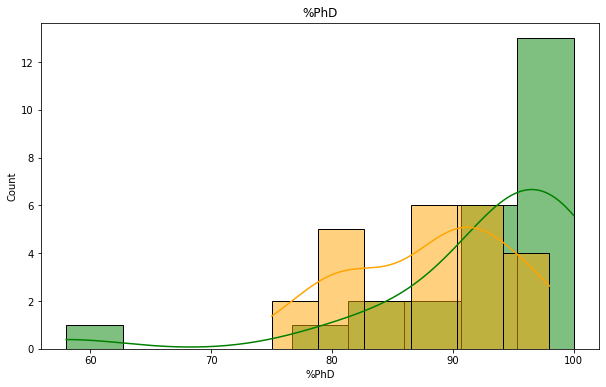

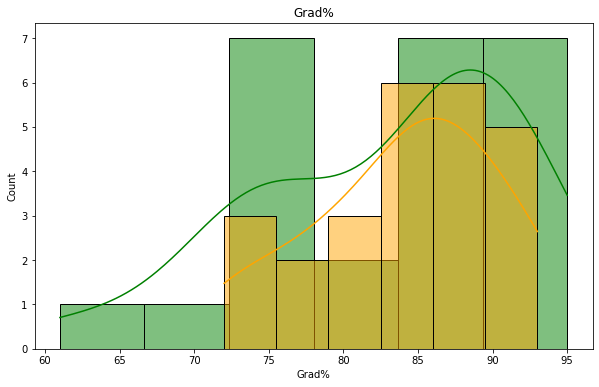

In [143]:
# Гистограмма для Acceptance
plt.figure(figsize=(10, 6))
sns.histplot(univ['Acceptance'], label='Univ', kde=True, color = 'green')
sns.histplot(libarts['Acceptance'], label='LibArts', kde=True, color = 'orange')
plt.title('Acceptance')
# Гистограмма для $/Student
plt.figure(figsize=(10, 6))
sns.histplot(univ['$/Student'], label='Univ', kde=True, color = 'green')
sns.histplot(libarts['$/Student'], label='LibArts', kde=True, color = 'orange')
plt.title('$/Student')
# Гистограмма для Top 10%
plt.figure(figsize=(10, 6))
sns.histplot(univ['Top 10%'], label='Univ', kde=True, color = 'green')
sns.histplot(libarts['Top 10%'], label='LibArts', kde=True, color = 'orange')
plt.title('Top 10%')
# Гистограмма для SAT
plt.figure(figsize=(10, 6))
sns.histplot(univ['SAT'], label='Univ', kde=True, color = 'green')
sns.histplot(libarts['SAT'], label='LibArts', kde=True, color = 'orange')
plt.title('SAT')
# Гистограмма для %PhD
plt.figure(figsize=(10, 6))
sns.histplot(univ['%PhD'], label='Univ', kde=True, color = 'green')
sns.histplot(libarts['%PhD'], label='LibArts', kde=True, color = 'orange')
plt.title('%PhD')
# Гистограмма для Grad%
plt.figure(figsize=(10, 6))
sns.histplot(univ['Grad%'], label='Univ', kde=True, color = 'green')
sns.histplot(libarts['Grad%'], label='LibArts', kde=True, color = 'orange')
plt.title('Grad%')

In [140]:
%%HTML
<input type="checkbox" id="0">
<label for="0"></label>Распределение процента факультетов с Phd в школах искусств напоминает "нормальное"<br>

<input type="checkbox" id="1">
<label for="1">Распределение процента факультетов с Phd в университетах напоминает "нормальное"</label><br>

<input type="checkbox" id="2">
<label for="2"></label>Гистограмма процента студентов, которые успешно завершили университеты, имеет несколько пиков<br>

<input type="checkbox" id="3">
<label for="3">Гистограмма процента студентов, которые успешно завершили школы искусств, имеет несколько пиков</label><br>

<input type="checkbox" id="5">
<label for="5">В университетах процент факультетов с Phd выше</label><br>

<input type="checkbox" id="4">
<label for="4">В школах искусств процент факультетов с Phd выше</label><br>

**Задание 4**\
Найдите:
+ выборочное среднее SAT школ искусств;
+ 3й выборочный квартиль Acceptance университетов;
+ название института(колледжа), в котором тратят денег в среднем на одного студента больше, чем в других институтах(колледжах).

In [144]:
libarts['SAT'].mean()

1256.64

In [146]:
np.percentile(univ['Acceptance'], 75)

45.0

In [162]:
df.loc[df['$/Student'].idxmax(), 'School']

'Cal Tech'